In [22]:
import pandas as pd

%matplotlib inline

In [2]:
!pwd

/c/Users/jared.wilber/Desktop/jenkem_data/koston/code


In [3]:
data_path = "../../../square-pie-tutorial/data/group_demog_2016_v3.tsv"

In [4]:
df = pd.read_table(data_path)
df.head()

,sex,racesimp,agegrp,married,children,college,healthcare,employed,selfemp,publictrans,inpoverty,isveteran,income_moremed,diffmovecog,diffhearvis,widowed,bornoutus,total
0,1,1,1,6,4,9,87,63,4,14,26,1,14,5,2,0,7,10816127
1,2,1,1,10,12,14,90,63,3,14,31,0,9,4,2,0,7,10211313
2,1,2,1,3,4,5,80,51,2,24,35,1,8,7,2,0,8,2371724
3,2,2,1,4,17,8,86,57,1,24,37,1,7,4,2,0,8,2261232
4,1,3,1,6,7,3,68,51,5,17,29,1,10,7,2,0,6,159797


In [108]:
pd.read_table("../data/kkoston.tsv")

,video,perc_stair,perc_ledge,perc_manual,perc_transition,perc_picnic,perc_handrail,perc_curb,perc_distinct,perc_slowmo,perc_switch,perc_fs,perc_bs
0,101 - WWII Report,0.181818,0.212121,0.151515,0.000000,0.000000,0.060606,0.030303,1.375000,0.000000,0.458333,0.500000,0.708333
1,Union - Right to Skate,0.100000,0.633333,0.033333,0.000000,0.000000,0.000000,0.433333,1.250000,0.041667,0.583333,0.333333,0.583333
2,H-Street - Next Generation,0.056075,0.214953,0.102804,0.299065,0.299065,0.056075,0.093458,1.166667,0.066667,0.222222,0.422222,0.677778
3,Girl - Goldfish,0.090909,0.218182,0.018182,0.000000,0.000000,0.000000,0.000000,2.750000,0.000000,1.750000,0.700000,0.950000
4,101 - Falling Down,0.083333,0.500000,0.187500,0.000000,0.000000,0.000000,0.125000,1.297297,0.000000,0.594595,0.432432,0.594595
5,Girl - Pretty Sweet,0.333333,0.333333,0.166667,0.083333,0.083333,0.000000,0.000000,1.375000,0.250000,0.375000,0.500000,1.000000
6,Etnies - High 5,0.000000,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,1.714286,0.000000,1.142857,0.142857,1.000000
7,Transworld - Uno,0.000000,0.411765,0.000000,0.000000,0.000000,0.176471,0.000000,1.133333,0.000000,0.400000,0.400000,0.666667
8,Girl - Mouse,0.032787,0.311475,0.049180,0.000000,0.000000,0.229508,0.000000,1.418605,0.000000,0.860465,0.697674,0.581395
9,Chocolate - The Chocolate Tour,0.090909,0.454545,0.000000,0.000000,0.000000,0.181818,0.000000,1.166667,0.277778,0.444444,0.388889,0.666667


In [150]:
df2 = pd.read_csv("../data/koston.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/jwilber/koston_article/master/data/koston.csv", sep="\t", encoding = "ISO-8859-1")

# total num tricks
aggregated = df2.groupby('video').max()['trick_index']
aggregated.name = 'total_num_tricks'
df3 = df2.join(aggregated, on='video')

# total num clips
aggregated = df2.groupby('video').max()['clip_index']
aggregated.name = 'total_num_clips'
df3 = df3.join(aggregated, on='video')


# total slowmo tricks
aggregated = df2.groupby('video').sum()['slowmo']
aggregated.name = 'total_slowmo_tricks'
df3 = df3.join(aggregated, on='video')


# total switch tricks
aggregated = df2.groupby('video').sum()['switch']
aggregated.name = 'total_switch_tricks'
df3 = df3.join(aggregated, on='video')

# total distinct
aggregated = df2.groupby('video').nunique()['trick']
aggregated.name = 'total_distinct_tricks'
df3 = df3.join(aggregated, on='video')

# total num fs tricks
aggregated = df2[['trick', 'video', 'trick_index', 'obstacle']].drop_duplicates().groupby(['video'])['trick'].apply(lambda x: x[x.str.contains('fs ')].count())
aggregated.name = 'total_fs_tricks'
df3 = df3.join(aggregated, on='video')

# total num bs tricks
aggregated = df2[['trick', 'video', 'trick_index', 'obstacle']].drop_duplicates().groupby(['video'])['trick'].apply(lambda x: x[x.str.contains('bs ')].count())
aggregated.name = 'total_bs_tricks'
df3 = df3.join(aggregated, on='video')

vids = df3.groupby('video')

# percent stair
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='stair']) + len(x[x=='gap']) ) / len(x))
obstacles.name = 'perc_stair'
df3 = df3.join(obstacles, on="video")


# percent ledge
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='ledge'])) / len(x))
obstacles.name = 'perc_ledge'
df3 = df3.join(obstacles, on="video")

# percent manual
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='manual'])) / len(x))
obstacles.name = 'perc_manual'
df3 = df3.join(obstacles, on="video")

# percent transition
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='transition'])) / len(x))
obstacles.name = 'perc_transition'
df3 = df3.join(obstacles, on="video")

# percent flat
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='flat'])) / len(x))
obstacles.name = 'perc_flat'
df3 = df3.join(obstacles, on="video")

# percent picnic table
obstacles = vids['obstacle_detailed'].agg(lambda x: (len(x[x=='picnic table'])) / len(x))
obstacles.name = 'perc_picnic'
df3 = df3.join(obstacles, on="video")

# percent handrail
obstacles = vids['obstacle_detailed'].agg(lambda x: (len(x[x=='handrail'])) / len(x))
obstacles.name = 'perc_handrail'
df3 = df3.join(obstacles, on="video")

# percent curb
obstacles = vids['obstacle_detailed'].agg(lambda x: (len(x[x=='curb'])) / len(x))
obstacles.name = 'perc_curb'
df3 = df3.join(obstacles, on="video")

cols_to_keep = ['video', 'total_num_tricks', 'total_num_clips', 'total_slowmo_tricks', 'total_switch_tricks',
       'total_distinct_tricks', 'total_fs_tricks', 'total_bs_tricks',
       'perc_stair', 'perc_ledge', 'perc_manual', 'perc_transition',
       'perc_picnic', 'perc_handrail', 'perc_curb', 'perc_flat']


df4 = df3[cols_to_keep].drop_duplicates().reset_index().drop(columns='index')

df4['perc_distinct'] = df4.apply(lambda x: x['total_distinct_tricks'] / x['total_num_tricks'], axis=1)

df4['perc_slowmo'] = df4.apply(lambda x: x['total_slowmo_tricks'] / x['total_num_tricks'], axis=1)

df4['perc_switch'] = df4.apply(lambda x: x['total_switch_tricks'] / x['total_num_tricks'], axis=1)

df4['perc_fs'] = df4.apply(lambda x: x['total_fs_tricks'] / x['total_num_tricks'], axis=1)

df4['perc_bs'] = df4.apply(lambda x: x['total_bs_tricks'] / x['total_num_tricks'], axis=1)

df5 = df4.drop(columns=['total_num_tricks', 'total_num_clips', 'total_slowmo_tricks', 'total_switch_tricks', 'total_distinct_tricks', 
                       'total_fs_tricks', 'total_bs_tricks'])


df5['video'] = df5.video.str.replace(' - ', '_', regex=False).str.replace(' ', '_', regex=False).str.replace('é', 'e', regex=False).str.replace('-', '_', regex=False).str.replace('.', '', regex=False)

for col in ['perc_stair', 'perc_ledge', 'perc_manual', 'perc_transition',
       'perc_picnic', 'perc_handrail', 'perc_curb', 'perc_distinct',
       'perc_slowmo', 'perc_switch', 'perc_fs', 'perc_bs', 'perc_flat']:
    df5[col] = round(df5[col] * 100)
    

In [156]:
df5[['video', 'perc_distinct']]

,video,perc_distinct
0,101_WWII_Report,91.0
1,Union_Right_to_Skate,97.0
2,H_Street_Next_Generation,90.0
3,Girl_Goldfish,73.0
4,101_Falling_Down,92.0
5,Girl_Pretty_Sweet,100.0
6,Etnies_High_5,100.0
7,Transworld_Uno,82.0
8,Girl_Mouse,87.0
9,Chocolate_The_Chocolate_Tour,100.0


In [8]:
import csv
df5.to_csv("../../../koston_article/data/kkoston.tsv", sep="\t", index=False, quotechar='"',
          quoting=csv.QUOTE_NONNUMERIC)

In [10]:
df5.to_csv("../../../koston_article/data/kkoston2.csv", index=False, quotechar='"',
          quoting=csv.QUOTE_NONNUMERIC)

In [297]:
trick_counts_df = pd.DataFrame(df3.trick.value_counts()[1:16])
trick_counts_df.columns = ['count']
trick_counts_df['trick'] = trick_counts_df.index
trick_counts_df.to_csv('../../../square-pie-tutorial/data/trickCounts.csv', index=False)

In [378]:
# need video, total num clips, total tricks, total distinct tricks
df4[['video', 'total_num_clips', 'total_num_tricks', 'total_distinct_tricks']].to_csv('../../../square-pie-tutorial/data/total_counts.csv', index=False)

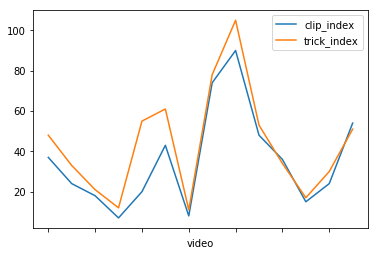

In [302]:
df3.groupby('video').max()[['clip_index', 'trick_index']].plot()

In [18]:
year_dict = {
    '101_WWII_Report': 1992,
    'Union_Right_to_Skate': 1992,
    'H_Street_Next_Generation': 1992,
    'Girl_Goldfish': 1994,
    '101_Falling_Down': 1993,
    'Girl_Pretty_Sweet':2012,
    'Etnies_High_5': 1995,
    'Transworld_Uno': 1996,
    'Girl_Mouse': 1996,
    'Chocolate_The_Chocolate_Tour': 1999,
    'Lakai_Fully_Flared': 2007,
    'Nike_The_SB_Chronicles_Vol_3':2015,
    'Girl_Yeah_Right': 2003,
    'eS_Menikmati': 2000,
    'Chomp_On_This': 2002
}


df5['year'] = df5.apply(lambda x: year_dict[x['video']], axis=1)

In [19]:
df5.sort_values('year', inplace=True)

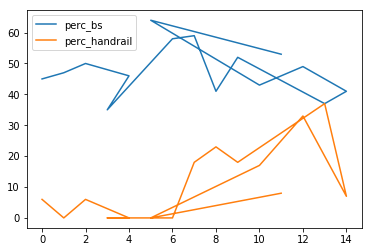

In [23]:
df5[['perc_bs', 'perc_handrail']].plot()

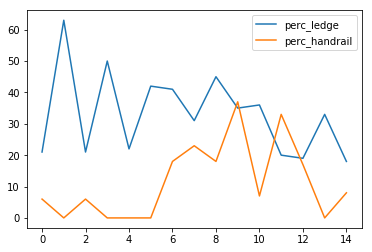

In [24]:
df6 = df5.reset_index()
df6[['perc_ledge', 'perc_handrail']].plot()

In [169]:
!pwd

/c/Users/jared.wilber/Desktop/jenkem_data/koston/code


In [25]:
df6

,index,video,perc_stair,perc_ledge,perc_manual,perc_transition,perc_picnic,perc_handrail,perc_curb,perc_flat,perc_distinct,perc_slowmo,perc_switch,perc_fs,perc_bs,year
0,0,101_WWII_Report,18.0,21.0,15.0,0.0,0.0,6.0,3.0,12.0,91.0,0.0,33.0,36.0,45.0,1992
1,1,Union_Right_to_Skate,10.0,63.0,3.0,0.0,0.0,0.0,43.0,23.0,97.0,3.0,47.0,27.0,47.0,1992
2,2,H_Street_Next_Generation,6.0,21.0,10.0,30.0,0.0,6.0,9.0,8.0,90.0,6.0,19.0,35.0,50.0,1992
3,4,101_Falling_Down,8.0,50.0,19.0,0.0,0.0,0.0,12.0,15.0,92.0,0.0,46.0,33.0,46.0,1993
4,3,Girl_Goldfish,9.0,22.0,2.0,0.0,0.0,0.0,0.0,60.0,73.0,0.0,64.0,25.0,35.0,1994
5,6,Etnies_High_5,0.0,42.0,0.0,0.0,0.0,0.0,0.0,33.0,100.0,0.0,67.0,8.0,58.0,1995
6,7,Transworld_Uno,0.0,41.0,0.0,0.0,18.0,18.0,0.0,12.0,82.0,0.0,35.0,35.0,59.0,1996
7,8,Girl_Mouse,3.0,31.0,5.0,0.0,8.0,23.0,0.0,16.0,87.0,0.0,61.0,49.0,41.0,1996
8,9,Chocolate_The_Chocolate_Tour,9.0,45.0,0.0,0.0,0.0,18.0,0.0,9.0,100.0,24.0,38.0,33.0,52.0,1999
9,13,eS_Menikmati,5.0,35.0,5.0,0.0,2.0,37.0,0.0,5.0,88.0,41.0,59.0,41.0,37.0,2000


In [26]:
df6.groupby('year').sum()

,index,perc_stair,perc_ledge,perc_manual,perc_transition,perc_picnic,perc_handrail,perc_curb,perc_flat,perc_distinct,perc_slowmo,perc_switch,perc_fs,perc_bs
year,,,,,,,,,,,,,,
1992,3,34.0,105.0,28.0,30.0,0.0,12.0,55.0,43.0,278.0,9.0,99.0,98.0,142.0
1993,4,8.0,50.0,19.0,0.0,0.0,0.0,12.0,15.0,92.0,0.0,46.0,33.0,46.0
1994,3,9.0,22.0,2.0,0.0,0.0,0.0,0.0,60.0,73.0,0.0,64.0,25.0,35.0
1995,6,0.0,42.0,0.0,0.0,0.0,0.0,0.0,33.0,100.0,0.0,67.0,8.0,58.0
1996,15,3.0,72.0,5.0,0.0,26.0,41.0,0.0,28.0,169.0,0.0,96.0,84.0,100.0
1999,9,9.0,45.0,0.0,0.0,0.0,18.0,0.0,9.0,100.0,24.0,38.0,33.0,52.0
2000,13,5.0,35.0,5.0,0.0,2.0,37.0,0.0,5.0,88.0,41.0,59.0,41.0,37.0
2002,14,4.0,36.0,14.0,0.0,0.0,7.0,0.0,12.0,93.0,7.0,22.0,33.0,41.0
2003,12,9.0,20.0,12.0,0.0,6.0,33.0,0.0,2.0,86.0,28.0,49.0,31.0,49.0


In [383]:
df3[df3.obstacle == 'flat'].trick.value_counts()[1:10]

nollie flip           4
switch flip           4
fs flip               4
bs bs shuv-it         3
bs flip               3
switch fs flip        3
switch fs heelflip    3
switch bs flip        3
switch treflip        2
Name: trick, dtype: int64

In [382]:
df3[df3.obstacle == 'rail'].trick.value_counts()[1:10]

switch fs tailslide                  4
nollie to fs noseblunt               4
fs 5050                              4
nollie heelflip to bs noseslide      4
fs boardslide                        3
bs boardslide                        3
switch fs noseblunt                  2
nollie to fs noseslide               2
bs tailslide to kickflip to fakie    2
Name: trick, dtype: int64

In [386]:
df3[df3.obstacle == 'ledge'].trick.value_counts()[1:10]

fs 180 to nosegrind         4
bs 5050                     4
fs bluntslide               3
bs noseslide                3
kickflip to fs tailslide    3
switch bs tailslide         3
bs tailslide to fakie       3
bs noseslide 270            3
bs tailslide                3
Name: trick, dtype: int64

In [390]:
df3[(df3.obstacle == 'stairs') | (df3.obstacle == 'stair') | (df3.obstacle == 'gap')].trick.value_counts()[1:10]

switch heelflip           5
switch bs flip            5
kickflip                  4
nollie bs heelflip        3
fakie 360 flip            3
nollie flip               3
switch varial heelflip    3
switch treflip            2
nollie heelflip           2
Name: trick, dtype: int64

In [391]:
dd = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv")

In [393]:
dd[dd.name == 'Helen']

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
7,1881,F,Helen,612,0.006191
14,1882,F,Helen,838,0.007243
21,1883,F,Helen,862,0.007180
28,1884,F,Helen,986,0.007166
36,1885,F,Helen,1134,0.007989
44,1886,F,Helen,1267,0.008241
52,1887,F,Helen,1405,0.009040
60,1888,F,Helen,1847,0.009749
68,1889,F,Helen,1909,0.010089


In [409]:
df3.obstacle.value_counts()
obstacles = ['ledge', 'rail', 'flat', 'manual', 'transition', 'stairs']
odf = df3[df3.obstacle.isin(obstacles)][['video', 'obstacle']]

In [412]:
year_dict = {
    '101_WWII_Report': 1992,
    'Union_Right_to_Skate': 1992,
    'H_Street_Next_Generation': 1992,
    'Girl_Goldfish': 1994,
    '101_Falling_Down': 1993,
    'Girl_Pretty_Sweet':2012,
    'Etnies_High_5': 1995,
    'Transworld_Uno': 1996,
    'Girl_Mouse': 1996,
    'Chocolate_The_Chocolate_Tour': 1999,
    'Lakai_Fully_Flared': 2007,
    'Nike_The_SB_Chronicles_Vol_3':2015,
    'Girl_Yeah_Right': 2003,
    'eS_Menikmati': 2000,
    'Chomp_On_This': 2002,
}

odf['video'] = odf.video.str.replace(' - ', '_', regex=False).str.replace(' ', '_', regex=False).str.replace('é', 'e', regex=False).str.replace('-', '_', regex=False).str.replace('.', '', regex=False)


odf['year'] = odf.apply(lambda x: year_dict[x['video']], axis=1)

In [415]:
odf.to_csv('../../../square-pie-tutorial/data/odf.csv', index=False)

In [432]:
t = odf.groupby(['year', 'obstacle']).count()
t.columns = ['year', 'obstacle', 'count']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 3 elements

In [434]:
odf

,video,obstacle,year
1,101_WWII_Report,ledge,1992
2,101_WWII_Report,ledge,1992
3,101_WWII_Report,manual,1992
4,101_WWII_Report,ledge,1992
6,101_WWII_Report,rail,1992
7,101_WWII_Report,flat,1992
9,101_WWII_Report,flat,1992
12,101_WWII_Report,rail,1992
13,101_WWII_Report,ledge,1992
14,101_WWII_Report,manual,1992


In [428]:
t = pd.read_csv('hmm.csv')
t.columns = ['year', 'obstacle', 'count']
t.to_csv('../../../square-pie-tutorial/data/odf.csv', index=False)

In [431]:
pd.read_csv('../data/koston.csv').trick.value_counts()

switch heelflip                                           10
kickflip                                                  10
switch fs tailslide                                        9
switch bs flip                                             9
bs flip                                                    8
bs 5050                                                    8
switch bs 180                                              8
nollie bs flip                                             8
nollie flip                                                7
fs flip                                                    6
nollie bs heelflip                                         6
switch fs flip                                             6
nollie heelflip to bs noseslide                            5
bs noseslide                                               5
bs heelflip                                                5
fs nosegrind                                               5
fs 5050                 

In [443]:
obstacles =['flat', 'rail', 'ledge', 'stairs']
df_tricks = df3[df3.obstacle.isin(obstacles)][['video', 'obstacle', 'trick']]

In [451]:
t = df_tricks.groupby(['obstacle', 'trick']).count()

In [460]:
t.sort_values(by=['obstacle', 'video'], ascending=False).to_csv('../../../koston_article/data/tricks_by_obstacle.csv')

In [15]:
df2.groupby(['video']).max()

,clip_index,trick_index,trick,switch,line,slowmo,obstacle
video,,,,,,,
101 - Falling Down,37,48,treflip to noseslide to fakie,1.0,1.0,NaN,up stairs
101 - WWII Report,24,33,switch fs flip,1.0,1.0,NaN,stair
Chocolate - The Chocolate Tour,18,21,switch varial heelflip,1.0,1.0,1.0,up stairs
Chomp On This,42,54,switch nose manual,1.0,1.0,1.0,stairs
Etnies - High 5,7,12,switch ollie,1.0,1.0,NaN,picnic table
Girl - Goldfish,20,55,treflip,1.0,1.0,NaN,up stairs
Girl - Mouse,43,61,switch treflip,1.0,1.0,NaN,up stairs
Girl - Pretty Sweet,8,11,treflip to nose manual to fakie,1.0,1.0,1.0,transition
Girl - Yeah Right,74,78,switch shuv-it to fakie manual,1.0,1.0,1.0,"up stairs, ledge"


In [27]:
df4

,video,total_num_tricks,total_num_clips,total_slowmo_tricks,total_switch_tricks,total_distinct_tricks,total_fs_tricks,total_bs_tricks,perc_stair,perc_ledge,...,perc_transition,perc_picnic,perc_handrail,perc_curb,perc_flat,perc_distinct,perc_slowmo,perc_switch,perc_fs,perc_bs
0,101 - WWII Report,33,24,0.0,11.0,30,12,15,0.181818,0.212121,...,0.000000,0.000000,0.060606,0.030303,0.121212,0.909091,0.000000,0.333333,0.363636,0.454545
1,Union - Right to Skate,30,24,1.0,14.0,29,8,14,0.100000,0.633333,...,0.000000,0.000000,0.000000,0.433333,0.233333,0.966667,0.033333,0.466667,0.266667,0.466667
2,H-Street - Next Generation,105,90,6.0,20.0,95,37,52,0.056075,0.214953,...,0.299065,0.000000,0.056075,0.093458,0.084112,0.904762,0.057143,0.190476,0.352381,0.495238
3,Girl - Goldfish,55,20,0.0,35.0,40,14,19,0.090909,0.218182,...,0.000000,0.000000,0.000000,0.000000,0.600000,0.727273,0.000000,0.636364,0.254545,0.345455
4,101 - Falling Down,48,37,0.0,22.0,44,16,22,0.083333,0.500000,...,0.000000,0.000000,0.000000,0.125000,0.145833,0.916667,0.000000,0.458333,0.333333,0.458333
5,Girl - Pretty Sweet,11,8,2.0,3.0,11,4,7,0.333333,0.333333,...,0.083333,0.000000,0.000000,0.000000,0.083333,1.000000,0.181818,0.272727,0.363636,0.636364
6,Etnies - High 5,12,7,0.0,8.0,12,1,7,0.000000,0.416667,...,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.666667,0.083333,0.583333
7,Transworld - Uno,17,15,0.0,6.0,14,6,10,0.000000,0.411765,...,0.000000,0.176471,0.176471,0.000000,0.117647,0.823529,0.000000,0.352941,0.352941,0.588235
8,Girl - Mouse,61,43,0.0,37.0,53,30,25,0.032787,0.311475,...,0.000000,0.081967,0.229508,0.000000,0.163934,0.868852,0.000000,0.606557,0.491803,0.409836
9,Chocolate - The Chocolate Tour,21,18,5.0,8.0,21,7,11,0.090909,0.454545,...,0.000000,0.000000,0.181818,0.000000,0.090909,1.000000,0.238095,0.380952,0.333333,0.523810


# Multiline Data

In [143]:
df2 = pd.read_csv("https://raw.githubusercontent.com/jwilber/koston_article/master/data/koston.csv", sep="\t", encoding = "ISO-8859-1")
df2.video.unique()

array(['101 - WWII Report', 'Union - Right to Skate',
       'H-Street - Next Generation', 'Girl - Goldfish',
       '101 - Falling Down', 'Girl - Pretty Sweet', 'Etnies - High 5',
       'Transworld - Uno', 'Girl - Mouse',
       'Chocolate - The Chocolate Tour', 'Lakai - Fully Flared',
       'Nike - The SB Chronicles Vol. 3', 'Girl - Yeah Right',
       'éS - Menikmati', 'Chomp On This'], dtype=object)

In [144]:
year_dict = {
    '101 - WWII Report': '1992',
    'Union - Right to Skate': '1992',
    'H-Street - Next Generation': '1992',
    'Girl - Goldfish': '1994',
    '101 - Falling Down': '1993',
    'Girl - Pretty Sweet':'2012',
    'Etnies - High 5': '1995',
    'Transworld - Uno': '1996',
    'Girl - Mouse': '1996',
    'Chocolate - The Chocolate Tour': '1999',
    'Lakai - Fully Flared': '2007',
    'Nike - The SB Chronicles Vol. 3':'2015',
    'Girl - Yeah Right': '2003',
    'éS - Menikmati': '2000',
    'Chomp On This': '2002'
}


df2['year'] = df2.apply(lambda x: year_dict[x['video']], axis=1)

In [145]:
# total num tricks
aggregated = df2.groupby('year').max()['trick_index']
aggregated.name = 'total_num_tricks'
df3 = df2.join(aggregated, on='year')

# total num clips
aggregated = df2.groupby('year').max()['clip_index']
aggregated.name = 'total_num_clips'
df3 = df3.join(aggregated, on='year')


# total slowmo tricks
aggregated = df2.groupby('year').sum()['slowmo']
aggregated.name = 'total_slowmo_tricks'
df3 = df3.join(aggregated, on='year')


# total switch tricks
aggregated = df2.groupby('year').sum()['switch']
aggregated.name = 'total_switch_tricks'
df3 = df3.join(aggregated, on='year')

# total distinct
aggregated = df2.groupby('year').nunique()['trick']
aggregated.name = 'total_distinct_tricks'
df3 = df3.join(aggregated, on='year')


vids = df3.groupby('year')


In [146]:

# percent stair
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='stair']) + len(x[x=='gap']) ))
obstacles.name = 'stairs'
df3 = df3.join(obstacles, on="year")


# percent ledge
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='ledge'])))
obstacles.name = 'ledge'
df3 = df3.join(obstacles, on="year")


# percent transition
obstacles = vids['obstacle'].agg(lambda x: (len(x[x=='transition'])))
obstacles.name = 'transition'
df3 = df3.join(obstacles, on="year")

# percent handrail
obstacles = vids['obstacle_detailed'].agg(lambda x: (len(x[x=='handrail'])))
obstacles.name = 'handrail'
df3 = df3.join(obstacles, on="year")

cols_to_keep = ['year', 'total_num_tricks', 'total_num_clips', 'total_slowmo_tricks', 'total_switch_tricks',
       'total_distinct_tricks',
       'stairs', 'ledge', 'transition',
       'handrail']


df4 = df3[cols_to_keep].drop_duplicates().reset_index().drop(columns='index')

df5 = df4.drop(columns=['total_num_tricks', 'total_num_clips', 'total_slowmo_tricks', 'total_switch_tricks', 'total_distinct_tricks'])


# df5['video'] = df5.video.str.replace(' - ', '_', regex=False).str.replace(' ', '_', regex=False).str.replace('é', 'e', regex=False).str.replace('-', '_', regex=False).str.replace('.', '', regex=False)

# for col in ['stairs', 'ledge', 'transition',
#        'handrail']:
#     df5[col] = round(df5[col] * 100)
    

In [147]:
df5

,year,stairs,ledge,transition,handrail
0,1992,15,49,32,8
1,1994,5,12,0,0
2,1993,4,24,0,0
3,2012,4,4,1,0
4,1995,0,5,0,0
5,1996,2,26,0,17
6,1999,2,10,0,4
7,2007,16,11,1,10
8,2015,0,7,4,3
9,2003,8,17,0,28


In [148]:
perc_df = pd.melt(df5, id_vars =['year'], value_vars =['stairs', 'ledge', 'handrail', 'transition'])
perc_df.sort_values('year', inplace=True)
perc_df.columns = ['year', 'obstacle', 'count']

In [149]:
perc_df.to_csv("../../../koston_article/data/perc_df.csv", index=False)

In [132]:
perc_df

,year,obstacle,count
0,1992,stairs,9.0
24,1992,handrail,5.0
36,1992,transition,19.0
12,1992,ledge,29.0
26,1993,handrail,0.0
38,1993,transition,0.0
14,1993,ledge,50.0
2,1993,stairs,8.0
1,1994,stairs,9.0
25,1994,handrail,0.0


In [107]:
df6 = df5[['year', 'perc_stair', 'perc_ledge', 'perc_handrail']]
df6.sort_values('year', inplace=True)

C:\Users\jared.wilber\AppData\Local\Continuum\anaconda3\envs\scrape\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
df6.to_csv("../../../koston_article/data/perc2_df.csv", index=False)

In [106]:
df6.sort_values('year', inplace=True)

,year,perc_stair,perc_ledge,perc_handrail
0,1992,9.0,29.0,5.0
2,1993,8.0,50.0,0.0
1,1994,9.0,22.0,0.0
4,1995,0.0,42.0,0.0
5,1996,3.0,33.0,22.0
6,1999,9.0,45.0,18.0
10,2000,5.0,35.0,37.0
11,2002,4.0,36.0,7.0
9,2003,9.0,20.0,33.0
7,2007,28.0,19.0,17.0


kkoston2.csv

perc_df.csv

top_n_tricks.csv

counts_by_obstacle.csv

In [157]:
jg = pd.read_csv("https://raw.githubusercontent.com/jwilber/jenkem_data/master/greco/data/greco.csv")

In [159]:
# total distinct
aggregated = jg.groupby('video').nunique()['trick']
aggregated.name = 'total_distinct_tricks'
jg2 = jg.join(aggregated, on='video')

# total num tricks
aggregated = jg.groupby('video').max()['trick_index']
aggregated.name = 'total_num_tricks'
jg3 = jg2.join(aggregated, on='video')

jg3['perc_distinct'] = jg3.apply(lambda x: x['total_distinct_tricks'] / x['total_num_tricks'], axis=1)


In [165]:
jg4 = jg3[['video', 'perc_distinct']].drop_duplicates()

In [166]:
jg4.perc_distinct.mean()

0.7872131388880592

In [168]:
df4.sort_values(by="perc_switch", ascending=False)

,video,total_num_tricks,total_num_clips,total_slowmo_tricks,total_switch_tricks,total_distinct_tricks,total_fs_tricks,total_bs_tricks,perc_stair,perc_ledge,...,perc_transition,perc_picnic,perc_handrail,perc_curb,perc_flat,perc_distinct,perc_slowmo,perc_switch,perc_fs,perc_bs
6,Etnies - High 5,12,7,0.0,8.0,12,1,7,0.000000,0.416667,...,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.666667,0.083333,0.583333
3,Girl - Goldfish,55,20,0.0,35.0,40,14,19,0.090909,0.218182,...,0.000000,0.000000,0.000000,0.000000,0.600000,0.727273,0.000000,0.636364,0.254545,0.345455
8,Girl - Mouse,61,43,0.0,37.0,53,30,25,0.032787,0.311475,...,0.000000,0.081967,0.229508,0.000000,0.163934,0.868852,0.000000,0.606557,0.491803,0.409836
13,éS - Menikmati,51,54,21.0,30.0,45,21,19,0.047619,0.349206,...,0.000000,0.015873,0.365079,0.000000,0.047619,0.882353,0.411765,0.588235,0.411765,0.372549
10,Lakai - Fully Flared,53,48,12.0,27.0,52,24,23,0.275862,0.189655,...,0.017241,0.017241,0.172414,0.000000,0.034483,0.981132,0.226415,0.509434,0.452830,0.433962
12,Girl - Yeah Right,78,74,22.0,38.0,67,24,38,0.094118,0.200000,...,0.000000,0.058824,0.329412,0.000000,0.023529,0.858974,0.282051,0.487179,0.307692,0.487179
1,Union - Right to Skate,30,24,1.0,14.0,29,8,14,0.100000,0.633333,...,0.000000,0.000000,0.000000,0.433333,0.233333,0.966667,0.033333,0.466667,0.266667,0.466667
4,101 - Falling Down,48,37,0.0,22.0,44,16,22,0.083333,0.500000,...,0.000000,0.000000,0.000000,0.125000,0.145833,0.916667,0.000000,0.458333,0.333333,0.458333
9,Chocolate - The Chocolate Tour,21,18,5.0,8.0,21,7,11,0.090909,0.454545,...,0.000000,0.000000,0.181818,0.000000,0.090909,1.000000,0.238095,0.380952,0.333333,0.523810
7,Transworld - Uno,17,15,0.0,6.0,14,6,10,0.000000,0.411765,...,0.000000,0.176471,0.176471,0.000000,0.117647,0.823529,0.000000,0.352941,0.352941,0.588235
